# Directory Setup and Navigation

In [ ]:
%mkdir ~/content

In [ ]:
%cd content

In [ ]:
pwd

# Python and PyTorch Environment Check

In [ ]:
!python3 --version

In [ ]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

# Open Grounding Dino Setup

In [ ]:
# Clone Open Grounding Dino repository
!git clone "https://github.com/longzw1997/Open-GroundingDino"

In [ ]:
# Rename repository
%mv Open-GroundingDino OpenGroundingDino

In [ ]:
# Change to the OpenGroundingDino directory
%cd OpenGroundingDino

In [ ]:
# Install the requirements from requirements.txt
!pip3 install -r requirements.txt

# Setting Up and Testing the GroundingDINO Ops Directory

In [ ]:
# Change directory to models/GroundingDINO/ops
%cd models/GroundingDINO/ops

In [ ]:
# Install the Python setup in the ops directory
!python3 setup.py install

In [ ]:
!python test.py

In [ ]:
%cd ~/content/

# Get the Data

### The Dataset is in COCO format

##### Make Changes

In [ ]:
# Downloading the Xray Dataset 
!pip3 install gdown
!gdown https://drive.google.com/uc?id=1efjyrh384P4h8vyvTzLOE6UiE59dyVEM

# Preparing the Dataset Directory

##### Make Changes

In [ ]:
%mkdir ~/content/xray_data

##### Make Changes

In [ ]:
!unzip ~/content/xray_data.zip -d ~/content/xray_data

# Visualize the Dataset

##### Make Changes

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Path to the folder containing the images
folder_path = '~/content/xray_data/xray_data/train'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter the list to include only files with image extensions
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]

# Randomly select 16 images from the list
selected_images = random.sample(image_files, 16)

# Set up the plot grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot each selected image in the grid
for ax, image_file in zip(axes.flatten(), selected_images):
    # Open the image file
    img = Image.open(os.path.join(folder_path, image_file))

    # Display the image on the grid
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

# Adjust the layout to be tight
plt.tight_layout()

# Show the plot
plt.show()

# Converting training data from COCO to odvg, Val data remains in COCO format only

In [ ]:
%cd ~/content

##### Make Changes

- You need to modify line 11 (new_id_map) and line 16 (new_ori_map) of OpenGroundingDino/tools/coco2odvg.py according to the dataset you plan to work with

In [ ]:
import re

# Define the file path
file_path = 'OpenGroundingDino/tools/coco2odvg.py'

# Define the new values according to the dataset
new_id_map = '{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}'
new_ori_map = '{"0": "aortic enlargement", "1": "atelectasis", "2": "calcification", "3": "cardiomegaly", "4": "consolidation", "5": "ild", "6": "infiltration", "7": "lung opacity", "8": "nodule mass", "9": "pleural effusion", "10": "pleural thickening", "11": "pneumothorax", "12": "pulmonary fibrosis", "13": "other lesion"}'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Replace the id_map value using regex
content = re.sub(r'id_map\s*=\s*\{[^\}]*\}', f'id_map = {new_id_map}', content)

# Replace the ori_map value using regex
content = re.sub(r'ori_map\s*=\s*\{[^\}]*\}', f'ori_map = {new_ori_map}', content)

# Write the updated content back to the file
with open(file_path, 'w') as file:
    file.write(content)

print(f"Updated {file_path} successfully.")

# Preparing Input Parameters and Converting COCO JSON

In [ ]:
# make a folder for odvg file
import os
%cd ~/content
%mkdir ~/content/input_params

##### Make Changes

In [ ]:
# change path of input file to your input Coco json file
!pip install jsonlines
!python ~/content/OpenGroundingDino/tools/coco2odvg.py --input "~/content/xray_data/xray_data/train/_annotations.coco.json"  --output "~/content/input_params/train.jsonl"

In [ ]:
%cd ~/content

# Make label.json with all labels

##### Make Changes

In [ ]:
import json

# Define the content for the JSON file
content = {
    "0": "aortic enlargement",
    "1": "atelectasis",
    "2": "calcification",
    "3": "cardiomegaly",
    "4": "consolidation",
    "5": "ild",
    "6": "infiltration",
    "7": "Lung Opacity",
    "8": "nodule mass",
    "9": "pleural effusion",
    "10": "pleural thickening",
    "11": "pneumothorax",
    "12": "pulmonary fibrosis",
    "13": "other lesion",
}

# Define the file path
file_path = '~/content/input_params/label.json'

# Write the content to the JSON file
with open(file_path, 'w') as file:
    json.dump(content, file)

print(f"File '{file_path}' created successfully.")

##### Make Changes

In [ ]:
#change the paths according to file locations
import json

# Define the data
data = {
    "train": [
        {
            "root": "~/content/xray_data/xray_data/train",#Train images
            "anno": "~/content/input_params/train.jsonl",#Odvg jsonl file
            "label_map": "~/content/input_params/label.json",# label.json file
            "dataset_mode": "odvg"
        }
    ],
    "val": [
        {
            "root": "~/content/xray_data/xray_data/test",#Test Images
            "anno": "~/content/xray_data/xray_data/test/_annotations.coco.json",#Test data Annotation file in COCO
            "label_map": None,
            "dataset_mode": "coco"
        }
    ]
}

file_path = '~/content/OpenGroundingDino/config/datasets_mixed_odvg.json'

with open(file_path, 'w') as file:
    json.dump(data, file, indent=2)

print(f"Data has been written to {file_path}")

# Modifying files according the dataset

modifying OpenGroundingDino/config/cfg_coco.py and OpenGroundingDino/config/cfg_odvg.py

##### Make Changes

In [ ]:
import re

def modify_file(file_path):
    label_list_content = 'label_list = ["aortic enlargement", "atelectasis", "calcification", "cardiomegaly", "consolidation", "ild", "infiltration", "lung opacity", "nodule mass", "pleural effusion", "pleural thickening", "pneumothorax", "pulmonary fibrosis", "other lesion"]\n'

    # Read the entire content of the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Replace use_coco_eval =TRUE with use_coco_eval =FALSE using regex
    content = re.sub(r'use_coco_eval\s*=\s*True', 'use_coco_eval = False', content)

    # Insert label_list after use_coco_eval = FALSE using regex
    content = re.sub(r'use_coco_eval\s*=\s*False', r'use_coco_eval = False\n\n' + label_list_content, content, count=1, flags=re.MULTILINE)

    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.write(content)

# Paths to the files
cfg_coco_path = '~/content/OpenGroundingDino/config/cfg_coco.py'
cfg_odvg_path = '~/content/OpenGroundingDino/config/cfg_odvg.py'

# Modify both files
modify_file(cfg_coco_path)
modify_file(cfg_odvg_path)

print("Updated use_coco_eval to FALSE and added label_list using regex in both files.")

# Setting Up the Output Directory and Download the Model Checkpoints 
### 'groundingdino_swint_ogc.pth'

##### Make Changes (if you want a different output directory name)

In [ ]:
# make a output directory to store the checkpoints of trained model
%mkdir ~/content/output_tiny

- If you want to use the base model then you will need to change this since this is the tiny version

In [ ]:
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

# Initialize and Save a Pretrained BERT Model

In [ ]:
%mkdir ~/content/bert

In [ ]:
from transformers import AutoTokenizer, AutoModel

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [ ]:
%cd ~/content/bert

In [ ]:
print(tokenizer.save_pretrained("."))
print(model.save_pretrained("."))

In [ ]:
%cd ~/content

# Replacing whole code of train_dist.sh with code below to run on single gpu

In [ ]:
def replace_file_content(file_path, new_content):
    try:
        # Open the file in write mode and replace its content
        with open(file_path, 'w') as file:
            file.write(new_content)
        print(f"Successfully replaced the content of {file_path}")
    except IOError as e:
        print(f"Error occurred while replacing content: {e}")

# Define the new content for the file
new_content = """\
CFG=$1
DATASETS=$2
OUTPUT_DIR=$3

# Set the environment variable for CUDA
export CUDA_VISIBLE_DEVICES=0

python main.py \\
    --config_file ${CFG} \\
    --datasets ${DATASETS} \\
    --output_dir ${OUTPUT_DIR} \\
    --pretrain_model_path ~/content/groundingdino_swint_ogc.pth \\
    --options text_encoder_type="~/content/bert"
"""

# Specify the file path
file_path = '~/content/OpenGroundingDino/train_dist.sh'

# Call the function to replace the content
replace_file_content(file_path, new_content)

In [ ]:
%cd ~/content

# Train the model

##### Make Changes if you changed the output directory

In [ ]:
%cd ~/content/OpenGroundingDino
GPU_NUM=1
CGF="~/content/OpenGroundingDino/config/cfg_odvg.py"
DATASETS="~/content/OpenGroundingDino/config/datasets_mixed_odvg.json"
OUTPUT_DIR="~/content/output_tiny"
!chmod +x train_dist.sh
!bash train_dist.sh {CGF} {DATASETS} {OUTPUT_DIR}

# Inference on the Data

In [ ]:
%cd ~/content
!git clone https://github.com/IDEA-Research/GroundingDINO.git

In [ ]:
%cd GroundingDINO/

In [ ]:
pwd

In [ ]:
!pip install ninja

In [ ]:
!pip install -e . --no-build-isolation --verbose

In [ ]:
%cd ~/content

# Creating a folder for Saving the images

In [ ]:
%mkdir ~/content/allval_images_in_folder

In [ ]:
%cd ~/content/allval_images_in_folder

# Modifying inference_on_a_image.py to Save Predictions to JSON Files

- This code modifies the inference_on_a_image.py script to save predictions to JSON files without manually editing the file.

In [ ]:
# Define the script path
script_path = '~/content/OpenGroundingDino/tools/inference_on_a_image.py'

In [ ]:
# Read the original script content
with open(script_path, 'r') as file:
    script_content = file.read()

In [ ]:
# Modify the script content
import re

# Define the code to add (the code that saves predictions)
new_code = '''
    # **Added code to save predictions to JSON file**
    import json

    prediction_output = {
        "image_path": image_path,
        "predictions": []
    }

    for box, label in zip(boxes_filt.tolist(), pred_phrases):
        prediction_output["predictions"].append({
            "box": box,  # [x_center, y_center, width, height] in normalized coordinates (0..1)
            "label": label
        })

    # Generate a unique name for the JSON file based on the image file name
    image_basename = os.path.basename(image_path)
    image_name, _ = os.path.splitext(image_basename)
    prediction_output_path = os.path.join(output_dir, f"{image_name}_predictions.json")
    with open(prediction_output_path, "w") as f:
        json.dump(prediction_output, f)

    print(f"Predictions saved to {prediction_output_path}")
'''

# Use regex to find the location after the line that saves the annotated image
pattern = r'(image_with_box\.save\(save_path\)\n)'
replacement = r'\1' + new_code + '\n'

# Modify the script content
modified_script_content = re.sub(pattern, replacement, script_content, flags=re.MULTILINE)

In [ ]:
# Write the modified content back to the script file
with open(script_path, 'w') as file:
    file.write(modified_script_content)

print(f"Modified {script_path} successfully.")

# Inference on a single Image

In [4]:
pwd

'/home/km/content'

##### Make Changes (-p, -i, -t)

In [6]:
!python "/home/km/content/OpenGroundingDino/tools/inference_on_a_image.py" \
  -c "/home/km/content/OpenGroundingDino/tools/GroundingDINO_SwinT_OGC.py" \
  -p "/home/km/content/output_tiny/checkpoint0014.pth" \
  -i "/home/km/content/xray_data/xray_data/valid/c4d68aad9fdec87b76853d26744026bb.jpg" \
  -t "nodule mass . pleural effusion . pleural thickening . pneumothorax . pulmonary fibrosis . other lesion " \
  -o pred_images

/home/km/pytorch_env/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/km/pytorch_env/lib/python3.10/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
final text_encoder_type: bert-base-uncased
/home/km/content/OpenGroundingDino/tools/inference_on_a_image.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/p

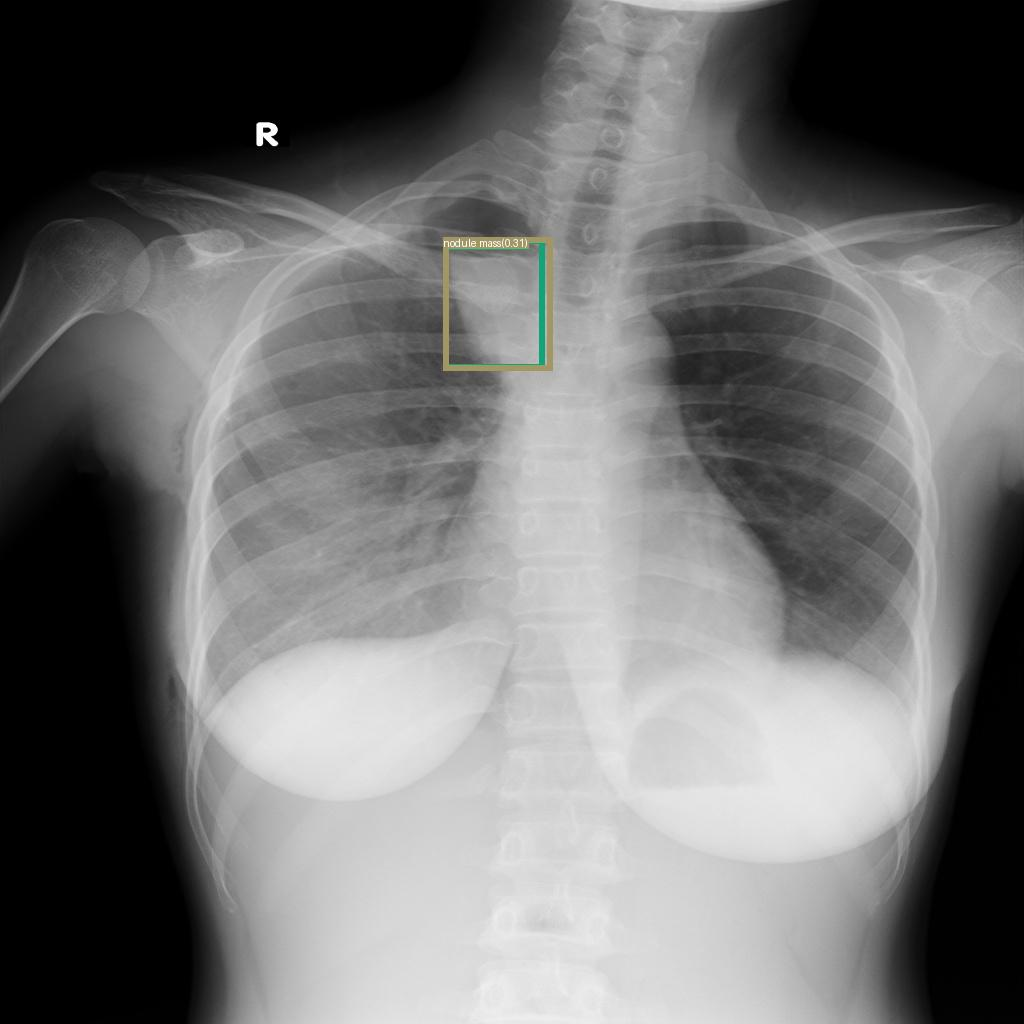

In [9]:
from PIL import Image
img=Image.open("/home/km/content/allval_images_in_folder/pred_images/pred.jpg")
img

# Inferencing on Val images folder

In [ ]:
pwd

##### Make Changes

In [ ]:
import os
import subprocess

# Directory containing the images
image_dir = "~/content/xray_data/xray_data/valid"

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]

# Define the other arguments for the inference script
config_path = "~/content/OpenGroundingDino/tools/GroundingDINO_SwinT_OGC.py"
checkpoint_path = "~/content/output_tiny/checkpoint0014.pth"  # Change
text_prompts = "aortic enlargement . atelectasis . calcification . cardiomegaly . consolidation . ild . infiltration . lung opacity . nodule mass . pleural effusion . pleural thickening . pneumothorax . pulmonary fibrosis . other lesion "
output_dir = "pred_images"

# Loop over all image files and run the inference script on each one
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    command = [
        "python", "~/content/OpenGroundingDino/tools/inference_on_a_image.py",
        "-c", config_path,
        "-p", checkpoint_path,
        "-i", image_path,
        "-t", text_prompts,
        "-o", output_dir+image_file
    ]
    subprocess.run(command)

# Organizing Images in a single folder and copying folder to Drive

In [ ]:
%mkdir ~/content/final_val_images

In [ ]:
import os
import shutil

def is_image(file):
    image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff']
    return any(file.lower().endswith(ext) for ext in image_extensions)

def copy_images(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for root, _, files in os.walk(src_dir):
        for file in files:
            if is_image(file):
                src_file_path = os.path.join(root, file)
                dest_file_path = os.path.join(dest_dir, file)

                # To handle duplicate filenames
                if os.path.exists(dest_file_path):
                    base, ext = os.path.splitext(file)
                    count = 1
                    while os.path.exists(dest_file_path):
                        dest_file_path = os.path.join(dest_dir, f"{base}_{count}{ext}")
                        count += 1

                shutil.copy2(src_file_path, dest_file_path)
                print(f"Copied {src_file_path} to {dest_file_path}")

# Example usage
src_directory = '~/content/allval_images_in_folder'
dest_directory = '~/content/final_val_images'
copy_images(src_directory, dest_directory)

# Visualizing the Annotated Images

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing the images
folder_path = '~/content/final_val_images'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter the list to include only files with image extensions and start with 'pred'
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp')) and file.lower().startswith('pred')]

# Randomly select 16 images from the filtered list
selected_images = random.sample(image_files, 16)

# Set up the plot grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot each selected image in the grid
for ax, image_file in zip(axes.flatten(), selected_images):
    # Open the image file
    img = Image.open(os.path.join(folder_path, image_file))

    # Display the image on the grid
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust the layout to be tight
plt.tight_layout()

# Show the plot
plt.show()